## Stats and Politics EDA
#### Rachel Kessler
#### 2019-10-20

The first step is to load in the clean data and take a look at the columns:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
df_votes = pd.read_csv('projectdata/votes_clean.csv')
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 13 columns):
Democrats 08 (Votes)      3109 non-null float64
Democrats 12 (Votes)      3109 non-null float64
Republicans 08 (Votes)    3109 non-null float64
Republicans 12 (Votes)    3109 non-null float64
votes16_trumpd            3109 non-null float64
votes16_clintonh          3109 non-null float64
Fips                      3109 non-null int64
Democrats 08 pct          3109 non-null float64
Democrats 12 pct          3109 non-null float64
Democrats 16 pct          3109 non-null float64
Republicans 08 pct        3109 non-null float64
Republicans 12 pct        3109 non-null float64
Republicans 16 pct        3109 non-null float64
dtypes: float64(12), int64(1)
memory usage: 315.8 KB


In [4]:
df_votes.head()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,Democrats 08 pct,Democrats 12 pct,Democrats 16 pct,Republicans 08 pct,Republicans 12 pct,Republicans 16 pct
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,5043,40.229173,40.355992,37.340073,59.770827,59.644008,62.659927
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,5087,35.055592,32.992770,24.400369,64.944408,67.007230,75.599631
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,13159,33.071270,30.847684,26.182805,66.928730,69.152316,73.817195
3,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,8037,61.720943,57.613836,60.812305,38.279057,42.386164,39.187695
4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,13091,31.887442,31.896552,26.775558,68.112558,68.103448,73.224442


In [5]:
df_data = pd.read_csv('projectdata/data_clean.csv')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 46 columns):
State                                                         3109 non-null object
ST                                                            3109 non-null object
Fips                                                          3109 non-null int64
County                                                        3109 non-null object
Precincts                                                     3109 non-null float64
Votes                                                         3109 non-null float64
Less Than High School Diploma                                 3109 non-null float64
At Least High School Diploma                                  3109 non-null float64
At Least Bachelors's Degree                                   3109 non-null float64
Graduate Degree                                               3109 non-null float64
School Enrollment                                         

## Analysis Part II

In order to begin the analysis, the dataframes are combined by merging based on the county unique Fips code.

In [6]:
df = pd.merge(df_votes, df_data, on='Fips', how='inner')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3108
Data columns (total 58 columns):
Democrats 08 (Votes)                                          3109 non-null float64
Democrats 12 (Votes)                                          3109 non-null float64
Republicans 08 (Votes)                                        3109 non-null float64
Republicans 12 (Votes)                                        3109 non-null float64
votes16_trumpd                                                3109 non-null float64
votes16_clintonh                                              3109 non-null float64
Fips                                                          3109 non-null int64
Democrats 08 pct                                              3109 non-null float64
Democrats 12 pct                                              3109 non-null float64
Democrats 16 pct                                              3109 non-null float64
Republicans 08 pct                                     

**Correlation with Republican vote share:**
The first step in analyzing the data is determining the correlations of each column with the Republican Vote Shares from each election. The correlations are combined into one dataframe in order to compare correlations across election years.

Correlation coefficient interpretation are classified as follows*:
* 0 - 0.1: Negligible
* 0.1 - 0.39: Weak
* 0.4 - 0.69: Moderate
* 0.7 - 0.89: Strong
* 0.9 - 1: Very Strong

***Source: https://journals.lww.com/anesthesia-analgesia/Fulltext/2018/05000/Correlation_Coefficients___Appropriate_Use_and.50.aspx**

In [8]:
corr_2008 = df.corrwith(df['Republicans 08 pct'])

In [9]:
corr_2012 = df.corrwith(df['Republicans 12 pct'])

In [10]:
corr_2016 = df.corrwith(df['Republicans 16 pct'])

In [13]:
df_corr = pd.concat([corr_2008,corr_2012,corr_2016],axis=1)
df_corr.columns = ['2008','2012','2016']
df_corr.style.background_gradient(cmap='coolwarm')

,2008,2012,2016
Democrats 08 (Votes),-0.316017,-0.327122,-0.400086
Democrats 12 (Votes),-0.317744,-0.330713,-0.404091
Republicans 08 (Votes),-0.214328,-0.231259,-0.332665
Republicans 12 (Votes),-0.211224,-0.225457,-0.330591
votes16_trumpd,-0.211797,-0.227189,-0.326831
votes16_clintonh,-0.314741,-0.327752,-0.408654
Fips,0.0233475,0.0496799,0.0550951
Democrats 08 pct,-1,-0.979485,-0.910576
Democrats 12 pct,-0.979485,-1,-0.946152
Democrats 16 pct,-0.910576,-0.946152,-1


In [16]:
df_corr.style.background_gradient(axis=1)

,2008,2012,2016
Democrats 08 (Votes),-0.316017,-0.327122,-0.400086
Democrats 12 (Votes),-0.317744,-0.330713,-0.404091
Republicans 08 (Votes),-0.214328,-0.231259,-0.332665
Republicans 12 (Votes),-0.211224,-0.225457,-0.330591
votes16_trumpd,-0.211797,-0.227189,-0.326831
votes16_clintonh,-0.314741,-0.327752,-0.408654
Fips,0.0233475,0.0496799,0.0550951
Democrats 08 pct,-1,-0.979485,-0.910576
Democrats 12 pct,-0.979485,-1,-0.946152
Democrats 16 pct,-0.910576,-0.946152,-1


Background color gradient was viewed first in order to determine rows with high or low correlations to Republican Vote Share, and then by the columns in order to quickly view how the trends from 2008 to 2016 elections.

Moderate or higher Correlations appear (for at least one election) within the following columns:
* At Least Bachelor's Degree (Negative)
* Graduate Degree (Negative)
* White (Not Latino) Population (Positive)
* African American Population (Negative)
* Asian American Population (Negative)
* White Asian Population (Positive)
* Children in Single Parent Households (Negative)
* Sexually Transmitted Infections (Negative)
* HIV Prevalence Rate (Negative)

The general trend observed appears that correlations get stronger from 2008 to 2012 to 2016. In other words, negative correlations get more negative and positive correlations get more positive.

**Correlation with racial demographics:** The racial demographics within the White (Not Latino), African American, and Asian American populations appear to be moderately correlated with the republican vote share. The White Population appears to be consistently positively correlated with Republican Vote Share and African American and Asian Populations appear to be consistently negatively correlated with republican vote shares. Each of these correlations are tested in order to determine if they are statstically significant. The hypothesis test will use a significance level of 0.05.

In [18]:
pearson_race_corr_dict = {}
def pearson_race_corr(race):
    X = df[race]
    y08 = df['Republicans 08 pct']
    y12 = df['Republicans 12 pct']
    y16 = df['Republicans 16 pct']
    pearson_race_corr_dict[race+' 08'] = stats.pearsonr(X,y08)
    pearson_race_corr_dict[race+' 12'] = stats.pearsonr(X,y12)
    pearson_race_corr_dict[race+' 16'] = stats.pearsonr(X,y16)

In [19]:
pearson_race_corr('White (Not Latino) Population')
pearson_race_corr('African American Population')
pearson_race_corr('Asian American Population')

In [20]:
df_pearson_race_corr = pd.DataFrame(pearson_race_corr_dict).transpose()
df_pearson_race_corr.columns = ['corr','p']
df_pearson_race_corr

,corr,p
White (Not Latino) Population 08,0.356314,9.989235e-94
White (Not Latino) Population 12,0.445079,3.640917e-151
White (Not Latino) Population 16,0.567906,5.031992e-265
African American Population 08,-0.313101,1.116308e-71
African American Population 12,-0.394466,2.809962e-116
African American Population 16,-0.461454,8.692900e-164
Asian American Population 08,-0.319775,7.446277e-75
Asian American Population 12,-0.334822,2.563420e-82
Asian American Population 16,-0.433294,1.683907e-142


Each population was tested in each election year for correlation significance with republican vote share. As shown in the table, the p value is well under 0.05 for each case, which indicates that the null hypothesis is rejected in each case. We can say that, in the population, there is a significant correlation between these races and republican vote share in these elections. This can be approximated with the sample correlations calculated.

**California and Texas correlations:** Counties are then analyzed in only California and Texas in order to compare correlations in these states to nationwide patterns, particularly within racial demographics.

In [21]:
df_cali = df[df['State'] == 'California']
df_texas = df[df['State'] == 'Texas']

In [22]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 5 to 3023
Data columns (total 58 columns):
Democrats 08 (Votes)                                          58 non-null float64
Democrats 12 (Votes)                                          58 non-null float64
Republicans 08 (Votes)                                        58 non-null float64
Republicans 12 (Votes)                                        58 non-null float64
votes16_trumpd                                                58 non-null float64
votes16_clintonh                                              58 non-null float64
Fips                                                          58 non-null int64
Democrats 08 pct                                              58 non-null float64
Democrats 12 pct                                              58 non-null float64
Democrats 16 pct                                              58 non-null float64
Republicans 08 pct                                            58 non-null flo

In [23]:
df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 48 to 3092
Data columns (total 58 columns):
Democrats 08 (Votes)                                          254 non-null float64
Democrats 12 (Votes)                                          254 non-null float64
Republicans 08 (Votes)                                        254 non-null float64
Republicans 12 (Votes)                                        254 non-null float64
votes16_trumpd                                                254 non-null float64
votes16_clintonh                                              254 non-null float64
Fips                                                          254 non-null int64
Democrats 08 pct                                              254 non-null float64
Democrats 12 pct                                              254 non-null float64
Democrats 16 pct                                              254 non-null float64
Republicans 08 pct                                            254

In [24]:
cali_corr_2008 = df_cali.corrwith(df['Republicans 08 pct'])
cali_corr_2012 = df_cali.corrwith(df['Republicans 12 pct'])
cali_corr_2016 = df_cali.corrwith(df['Republicans 16 pct'])
df_cali_corr = pd.concat([cali_corr_2008,cali_corr_2012,cali_corr_2016],axis=1)
df_cali_corr.columns = ['CA 2008','CA 2012','CA 2016']

In [25]:
texas_corr_2008 = df_texas.corrwith(df['Republicans 08 pct'])
texas_corr_2012 = df_texas.corrwith(df['Republicans 12 pct'])
texas_corr_2016 = df_texas.corrwith(df['Republicans 16 pct'])
df_texas_corr = pd.concat([texas_corr_2008,texas_corr_2012,texas_corr_2016],axis=1)
df_texas_corr.columns = ['TX 2008','TX 2012','TX 2016']

In [26]:
df_corr_2 = pd.concat([df_corr,df_cali_corr,df_texas_corr],axis=1)
df_corr_2.style.background_gradient(cmap='coolwarm',axis=1)

,2008,2012,2016,CA 2008,CA 2012,CA 2016,TX 2008,TX 2012,TX 2016
Democrats 08 (Votes),-0.316017,-0.327122,-0.400086,-0.334075,-0.351336,-0.387563,-0.285856,-0.288303,-0.369739
Democrats 12 (Votes),-0.317744,-0.330713,-0.404091,-0.330722,-0.348599,-0.383948,-0.287593,-0.290896,-0.37079
Republicans 08 (Votes),-0.214328,-0.231259,-0.332665,-0.171927,-0.189938,-0.258674,-0.211813,-0.212205,-0.302168
Republicans 12 (Votes),-0.211224,-0.225457,-0.330591,-0.163989,-0.18082,-0.252737,-0.208145,-0.207749,-0.298466
votes16_trumpd,-0.211797,-0.227189,-0.326831,-0.135548,-0.15481,-0.230059,-0.207318,-0.206036,-0.298722
votes16_clintonh,-0.314741,-0.327752,-0.408654,-0.344554,-0.363252,-0.404241,-0.287976,-0.290744,-0.373336
Fips,0.0233475,0.0496799,0.0550951,-0.0251522,-0.0234078,-0.0386467,-0.0222571,-0.0299205,-0.0290603
Democrats 08 pct,-1,-0.979485,-0.910576,-1,-0.995656,-0.977788,-1,-0.989906,-0.968078
Democrats 12 pct,-0.979485,-1,-0.946152,-0.995656,-1,-0.981238,-0.989906,-1,-0.980882
Democrats 16 pct,-0.910576,-0.946152,-1,-0.977788,-0.981238,-1,-0.968078,-0.980882,-1


By viewing the table gradient based on the columns and with a cool-warm color scheme, it can quickly be determined that Texas and California tend to have opposite correlation, indicating that the presence of a certain characteristic in the state results in opposite correlations with the republican vote share.

One particular difference is noted in the level of education. As level of education increases in California, the correlation with republican vote share becomes more negative. Alternatively, as level of education increases in Texas, the level of positive correlation decreases until the correlation gets close to zero. 


Looking specifically at race: In Califronia, the white population appears to be less strongly correlated with republican vote share than the national average. In texas, the white population appears to be more strongly correlated. In both states, the African American population appears to be less negatively correlated with the republican vote share than the national average. In California, the Asian American population appearas to be more negatively correlated than the national average, whereas Texas is less negatively correlated. Texas and California, in many cases do not share the same correlations as on the national level.

## Analyze III

**Visualization of the Repulican Vote Share:** The next step in the analysis of the election data is to create plots in order to visualize the share of republican vote shares by county in each election. This was completed using a histogram.

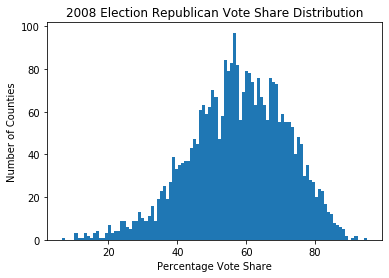

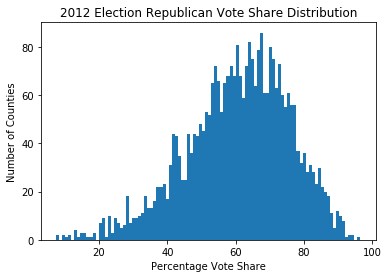

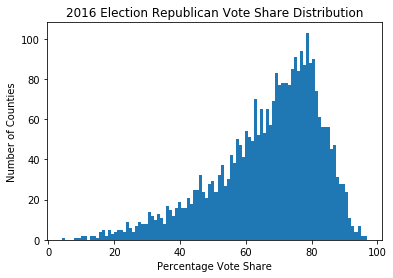

In [84]:
plt.figure()
plt.hist(df['Republicans 08 pct'],bins=100)
plt.xlabel('Percentage Vote Share')
plt.ylabel('Number of Counties')
plt.title('2008 Election Republican Vote Share Distribution')
plt.show()

plt.figure()
plt.hist(df['Republicans 12 pct'],bins=100)
plt.xlabel('Percentage Vote Share')
plt.ylabel('Number of Counties')
plt.title('2012 Election Republican Vote Share Distribution')
plt.show()

plt.figure()
plt.hist(df['Republicans 16 pct'],bins=100)
plt.xlabel('Percentage Vote Share')
plt.ylabel('Number of Counties')
plt.title('2016 Election Republican Vote Share Distribution')
plt.show()

As shown in the histograms, the data transitions from normally distributed to skewed from 2008 to 2016, respectively. The median appears to shift up as the election years pass, as well shifting from around 60% to around 70% over the 8 years. The data appears to reflect the election results. 

**Visualization of the Republican Vote Share by State:** Next, the data is aggregated by state and plotted again.

In [86]:
df_agg_state = df.groupby('State').sum()
df_agg_state.head()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,Democrats 08 pct,Democrats 12 pct,Democrats 16 pct,...,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Injury.deaths
State,,,,,,,,,,,,,,,,,,,,,
Alabama,813479.0,795696.0,1266546.0,1255925.0,1306925.0,718084.0,71489,2583.559073,2593.085937,2300.436892,...,27.178,15.013,23.505,9.435,41610.20,13717.1,11.668,5.742,23816.890,5530.5
Arizona,1034707.0,1025232.0,1230111.0,1233654.0,1021154.0,936250.0,60208,667.782915,671.472636,664.165191,...,5.629,2.773,4.171,1.512,6139.30,1949.8,3.080,1.711,6046.115,1389.7
Arkansas,414727.0,387201.0,619021.0,628279.0,656602.0,371793.0,370445,2779.751873,2616.238415,2318.818382,...,26.904,17.677,24.549,9.092,40011.00,9955.6,15.372,6.023,25602.995,6212.6
California,8274473.0,7854285.0,5011781.0,4839958.0,3916209.0,7362490.0,351364,3154.414275,3085.106274,3116.325640,...,18.590,9.091,14.047,4.685,18372.50,11098.1,10.994,7.106,23701.960,3809.2
Colorado,1288633.0,1323101.0,1073629.0,1185243.0,1137455.0,1212209.0,515983,2951.578629,2812.024297,2542.686568,...,16.392,11.802,13.237,4.036,17642.15,7788.0,12.722,4.850,12857.095,5126.3


In [87]:
df_agg_state['Agg_Rep_2008_Share'] = df_agg_state['Republicans 08 (Votes)']/(df_agg_state['Democrats 08 (Votes)']+df_agg_state['Republicans 08 (Votes)'])*100

df_agg_state['Agg_Rep_2012_Share'] = df_agg_state['Republicans 08 (Votes)']/(df_agg_state['Democrats 12 (Votes)']+df_agg_state['Republicans 12 (Votes)'])*100

df_agg_state['Agg_Rep_2016_Share'] = df_agg_state['votes16_trumpd']/(df_agg_state['votes16_clintonh']+df_agg_state['votes16_trumpd'])*100

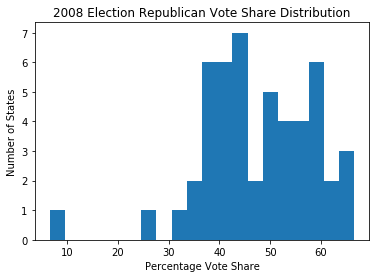

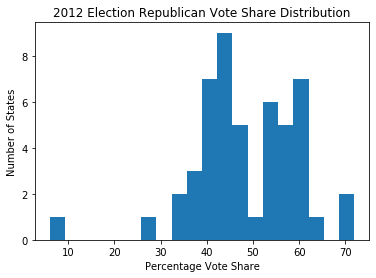

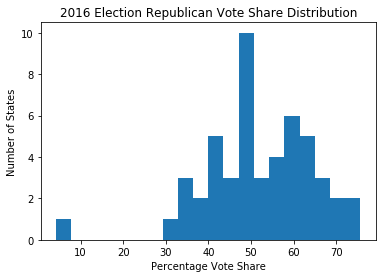

In [88]:
plt.figure()
plt.hist(df_agg_state['Agg_Rep_2008_Share'],bins=20)
plt.xlabel('Percentage Vote Share')
plt.ylabel('Number of States')
plt.title('2008 Election Republican Vote Share Distribution')
plt.show()

plt.figure()
plt.hist(df_agg_state['Agg_Rep_2012_Share'],bins=20)
plt.xlabel('Percentage Vote Share')
plt.ylabel('Number of States')
plt.title('2012 Election Republican Vote Share Distribution')
plt.show()

plt.figure()
plt.hist(df_agg_state['Agg_Rep_2016_Share'],bins=20)
plt.xlabel('Percentage Vote Share')
plt.ylabel('Number of States')
plt.title('2016 Election Republican Vote Share Distribution')
plt.show()

From these plots the distribution doesn't seem to skew upwwards as much as the elections progress, however there appears to be somewhat bimodal distributions in 2008 and 2012, with groups of states with modes around 40% and 60% republican vote share. This reflects the split political affiliations present within the various states of the United States. 

**Statistical tests**: A statistical test was performed in order to determine whether the mean Republican party vote share across all of the counties are different for the 3 elections. It is assumed that the people who voted in each county are representative of the population.

An ANOVA test was performed on the data because it allows for the determination if any of the three elections are different from the others. 

In [72]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import multicomp

In [68]:
df_rep = df[['Republicans 08 pct','Republicans 12 pct','Republicans 16 pct']].stack().reset_index().iloc[:,-2:]

An initial calcuation of the mean and visualization of the data before it is determined whether they are statistically different:

In [81]:
df_rep.columns = ['Election','Rep_Vote_Share']
df_rep.groupby(['Election']).mean()

,Rep_Vote_Share
Election,
Republicans 08 pct,57.764590
Republicans 12 pct,60.793640
Republicans 16 pct,66.721292


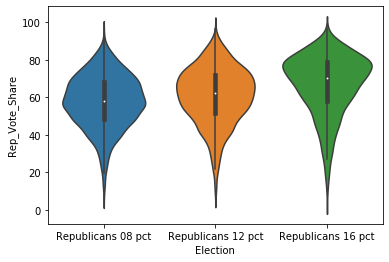

In [75]:
sns.violinplot(x = 'Election', y = 'Rep_Vote_Share', data = df_rep);

In [71]:
lm_rep_vote_share = ols("Rep_Vote_Share ~ Election", data = df_rep).fit()
anova_lm(lm_rep_vote_share)

,df,sum_sq,mean_sq,F,PR(>F)
Election,2.0,1.290595e+05,64529.735049,284.180496,1.575297e-120
Residual,9324.0,2.117229e+06,227.073060,NaN,NaN


In [89]:
lm_rep_vote_share.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Rep_Vote_Share   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     284.2
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          1.58e-120
Time:                        16:13:00   Log-Likelihood:                -38534.
No. Observations:                9327   AIC:                         7.707e+04
Df Residuals:                    9324   BIC:                         7.709e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         57.7646      0.270    213.742      0.000      57.235      58.294
Election[T.Republicans 12 pct]     3.0291      0.382      7.925      0.000       2.280       3.778
Election[T.Republicans 16 pct]     8.9567      0.382     23.435      0.000       8.208       9.706
==============================================================================
Omnibus:                      537.196   Durbin-Watson:                   0.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.929
Skew:                          -0.622   Prob(JB):                    3.64e-138
Kurtosis:                       3.288   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ANOVA shows that at least one mean is different from at least one of the others. With p values close to 0 in each category, it shows that the means are different.

In order to determine which is different, Tukey's Honestly Significant Difference test is used to calculate all pairwise comparisons.

In [73]:
results = multicomp.pairwise_tukeyhsd(df_rep['Rep_Vote_Share'], df_rep['Election']).summary()
df_results = pd.DataFrame(results.data[1:], columns = results.data[0])
df_results.query("reject == True")

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Republicans 08 pct,Republicans 12 pct,3.0291,0.001,2.1331,3.9250,True
1,Republicans 08 pct,Republicans 16 pct,8.9567,0.001,8.0608,9.8526,True
2,Republicans 12 pct,Republicans 16 pct,5.9277,0.001,5.0317,6.8236,True


According to the test, with the adjusted p values (all below the significance level of 0.05), we can reject the null hypothesis and conclude that the means of the republican vote shares of each of these elections is statistically different. The difference in the sample means can be used to approximate those differences.